# Importing necessary packages

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
import xgboost as xgb

In [5]:
# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Pre-processing

In [6]:
# Checking the first few rows
print(data.head())

   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb   

In [7]:
print(data.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')


In [8]:
# Converting the categorical variables to numerical variables
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])

In [9]:
# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Revenue'], axis=1))

In [10]:
# Adding the 'Revenue' column back to the data
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Revenue'] = data['Revenue']

In [11]:
# Displaying the data info
print(scaled_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  float64
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  float64
 13  Region                   12330 non-null  float64
 14  TrafficType           

# Explaratory Data Analysis(EDA)

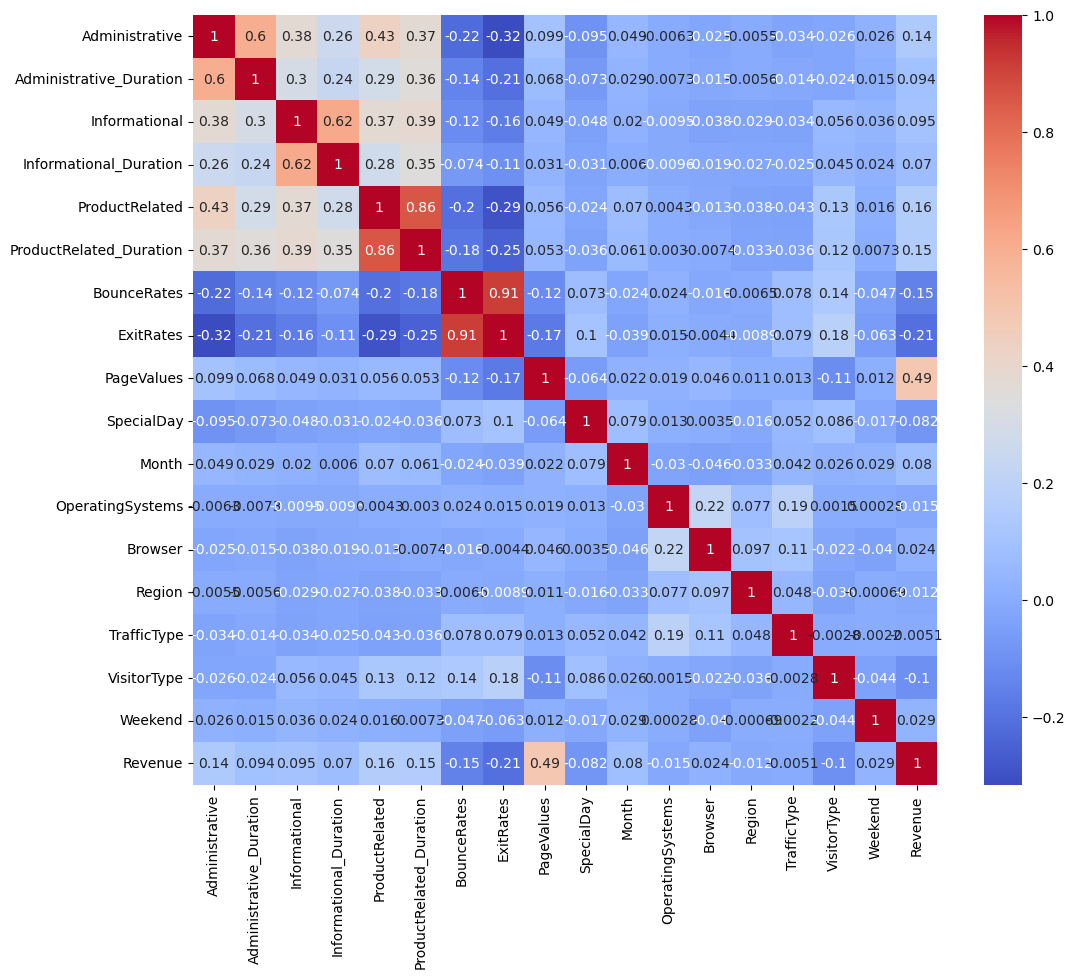

In [13]:
# Display the correlation matrix
corr_matrix = scaled_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Analyzing if seasonality affects Conversion Rates

In [15]:
# Analyze the effect of months (seasons) on conversion rates
month_conversion = scaled_data.groupby('Month')['Revenue'].mean()
print(month_conversion)

Month
-2.178804    0.175520
-1.756881    0.125072
-1.334959    0.016304
-0.913036    0.152778
-0.491114    0.100694
-0.069191    0.100682
 0.352731    0.108502
 0.774654    0.253502
 1.196576    0.209472
 1.618499    0.191964
Name: Revenue, dtype: float64


# Note: Revenue of the month, "January" and "April" in dataset is not available.

C:\Users\Venkat Naveen\AppData\Local\Temp\ipykernel_21036\1991397175.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'], y=df['Conversion_Rate'], palette='viridis')


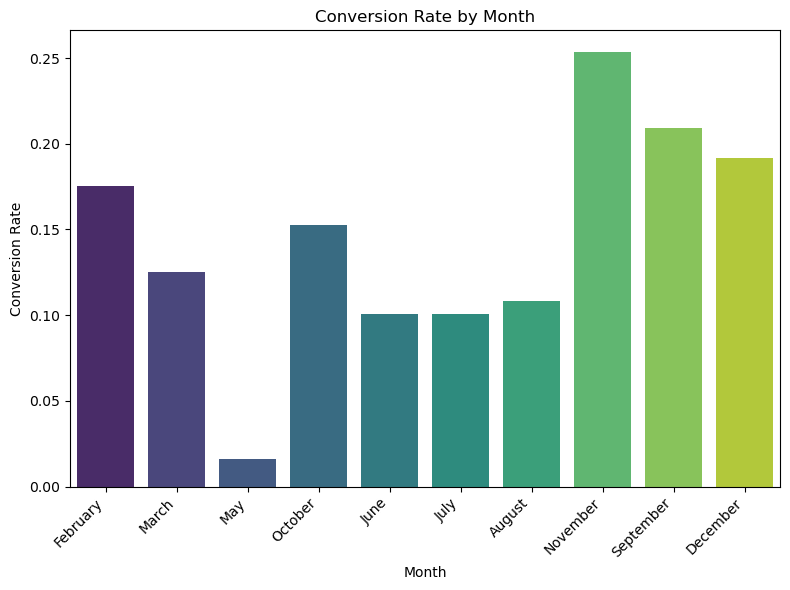

In [87]:
# Given data (as a dictionary for example purposes)
data = {
    'Month': [-2.178804, -1.756881, -1.334959, -0.913036, -0.491114, -0.069191, 0.352731, 0.774654, 1.196576, 1.618499],
    'Conversion_Rate': [0.175520, 0.125072, 0.016304, 0.152778, 0.100694, 0.100682, 0.108502, 0.253502, 0.209472, 0.191964]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a dictionary to map transformed month values to month names
month_names = {
    -2.178804: 'February', 
    -1.756881: 'March', 
    -1.334959: 'May',
    -0.491114: 'June', 
    -0.069191: 'July', 
    0.352731: 'August', 
    1.196576: 'September',
    -0.913036: 'October', 
    0.774654: 'November', 
    1.618499: 'December'
}

# Map the transformed month values to month names
df['Month'] = df['Month'].map(month_names)

# Plot the conversion rates by month
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Month'], y=df['Conversion_Rate'], palette='viridis')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
# Analyze the impact of weekends
weekend_conversion = scaled_data.groupby('Weekend')['Revenue'].mean()
print(weekend_conversion)

Weekend
-0.550552    0.148911
 1.816360    0.173989
Name: Revenue, dtype: float64


C:\Users\Venkat Naveen\AppData\Local\Temp\ipykernel_21036\4241334471.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_weekend['Weekend'], y=df_weekend['Conversion_Rate'], palette='viridis')


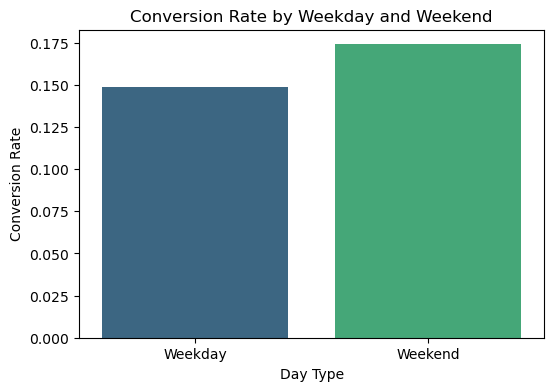

In [19]:
# Given data for weekend conversion rates
weekend_data = {
    'Weekend': [-0.550552, 1.816360],
    'Conversion_Rate': [0.148911, 0.173989]
}

# Create a DataFrame
df_weekend = pd.DataFrame(weekend_data)

# Create a dictionary to map numeric values to 'Weekday' and 'Weekend'
weekend_labels = {
    -0.550552: 'Weekday', 
    1.816360: 'Weekend'
}

# Map the numeric values to 'Weekday' and 'Weekend'
df_weekend['Weekend'] = df_weekend['Weekend'].map(weekend_labels)

# Plot the conversion rates by weekend/weekday
plt.figure(figsize=(6, 4))
sns.barplot(x=df_weekend['Weekend'], y=df_weekend['Conversion_Rate'], palette='viridis')
plt.xlabel('Day Type')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Weekday and Weekend')
plt.show()


SpecialDay
-0.308821    0.165268
 0.696663    0.078652
 1.702146    0.053498
 2.707630    0.082621
 3.713114    0.033846
 4.718598    0.064935
Name: Revenue, dtype: float64


C:\Users\Venkat Naveen\AppData\Local\Temp\ipykernel_21036\2913708805.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=specialday_conversion.index, y=specialday_conversion.values, marker='o', palette='viridis')


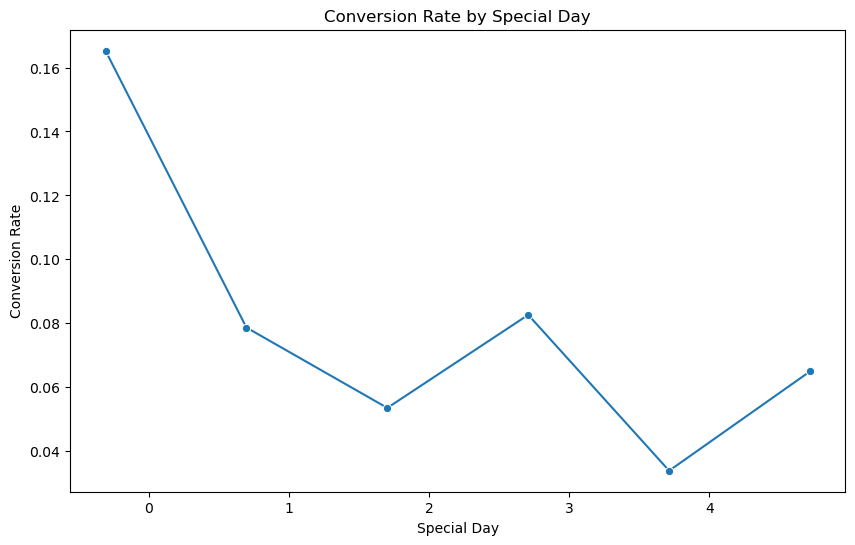

In [20]:
# Analyze the impact of special days
specialday_conversion = scaled_data.groupby('SpecialDay')['Revenue'].mean()
print(specialday_conversion)

plt.figure(figsize=(10, 6))
sns.lineplot(x=specialday_conversion.index, y=specialday_conversion.values, marker='o', palette='viridis')
plt.xlabel('Special Day')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Special Day')
plt.show()

C:\Users\Venkat Naveen\AppData\Local\Temp\ipykernel_21036\1181157005.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_special_day['SpecialDay'], y=df_special_day['Conversion_Rate'], palette='viridis')


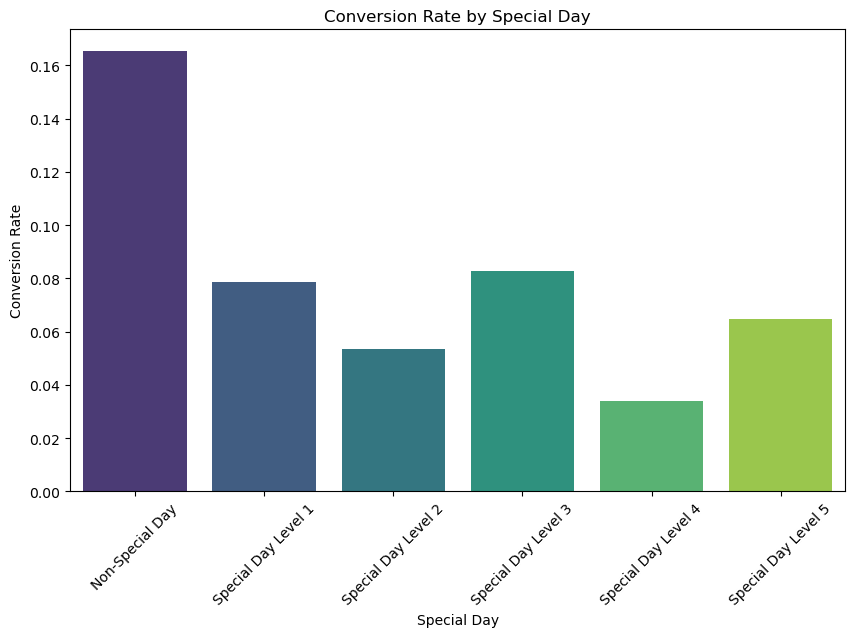

In [21]:
# Given data for SpecialDay conversion rates
special_day_data = {
    'SpecialDay': [-0.308821, 0.696663, 1.702146, 2.707630, 3.713114, 4.718598],
    'Conversion_Rate': [0.165268, 0.078652, 0.053498, 0.082621, 0.033846, 0.064935]
}

# Create a DataFrame
df_special_day = pd.DataFrame(special_day_data)

# Create a dictionary to map numeric values to descriptive labels
special_day_labels = {
    -0.308821: 'Non-Special Day', 
     0.696663: 'Special Day Level 1', 
     1.702146: 'Special Day Level 2', 
     2.707630: 'Special Day Level 3', 
     3.713114: 'Special Day Level 4', 
     4.718598: 'Special Day Level 5'
}

# Map the numeric values to descriptive labels
df_special_day['SpecialDay'] = df_special_day['SpecialDay'].map(special_day_labels)

# Plot the conversion rates by special day
plt.figure(figsize=(10, 6))
sns.barplot(x=df_special_day['SpecialDay'], y=df_special_day['Conversion_Rate'], palette='viridis')
plt.xlabel('Special Day')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate by Special Day')
plt.xticks(rotation=45)
plt.show()


# Clickstream Data Analysis

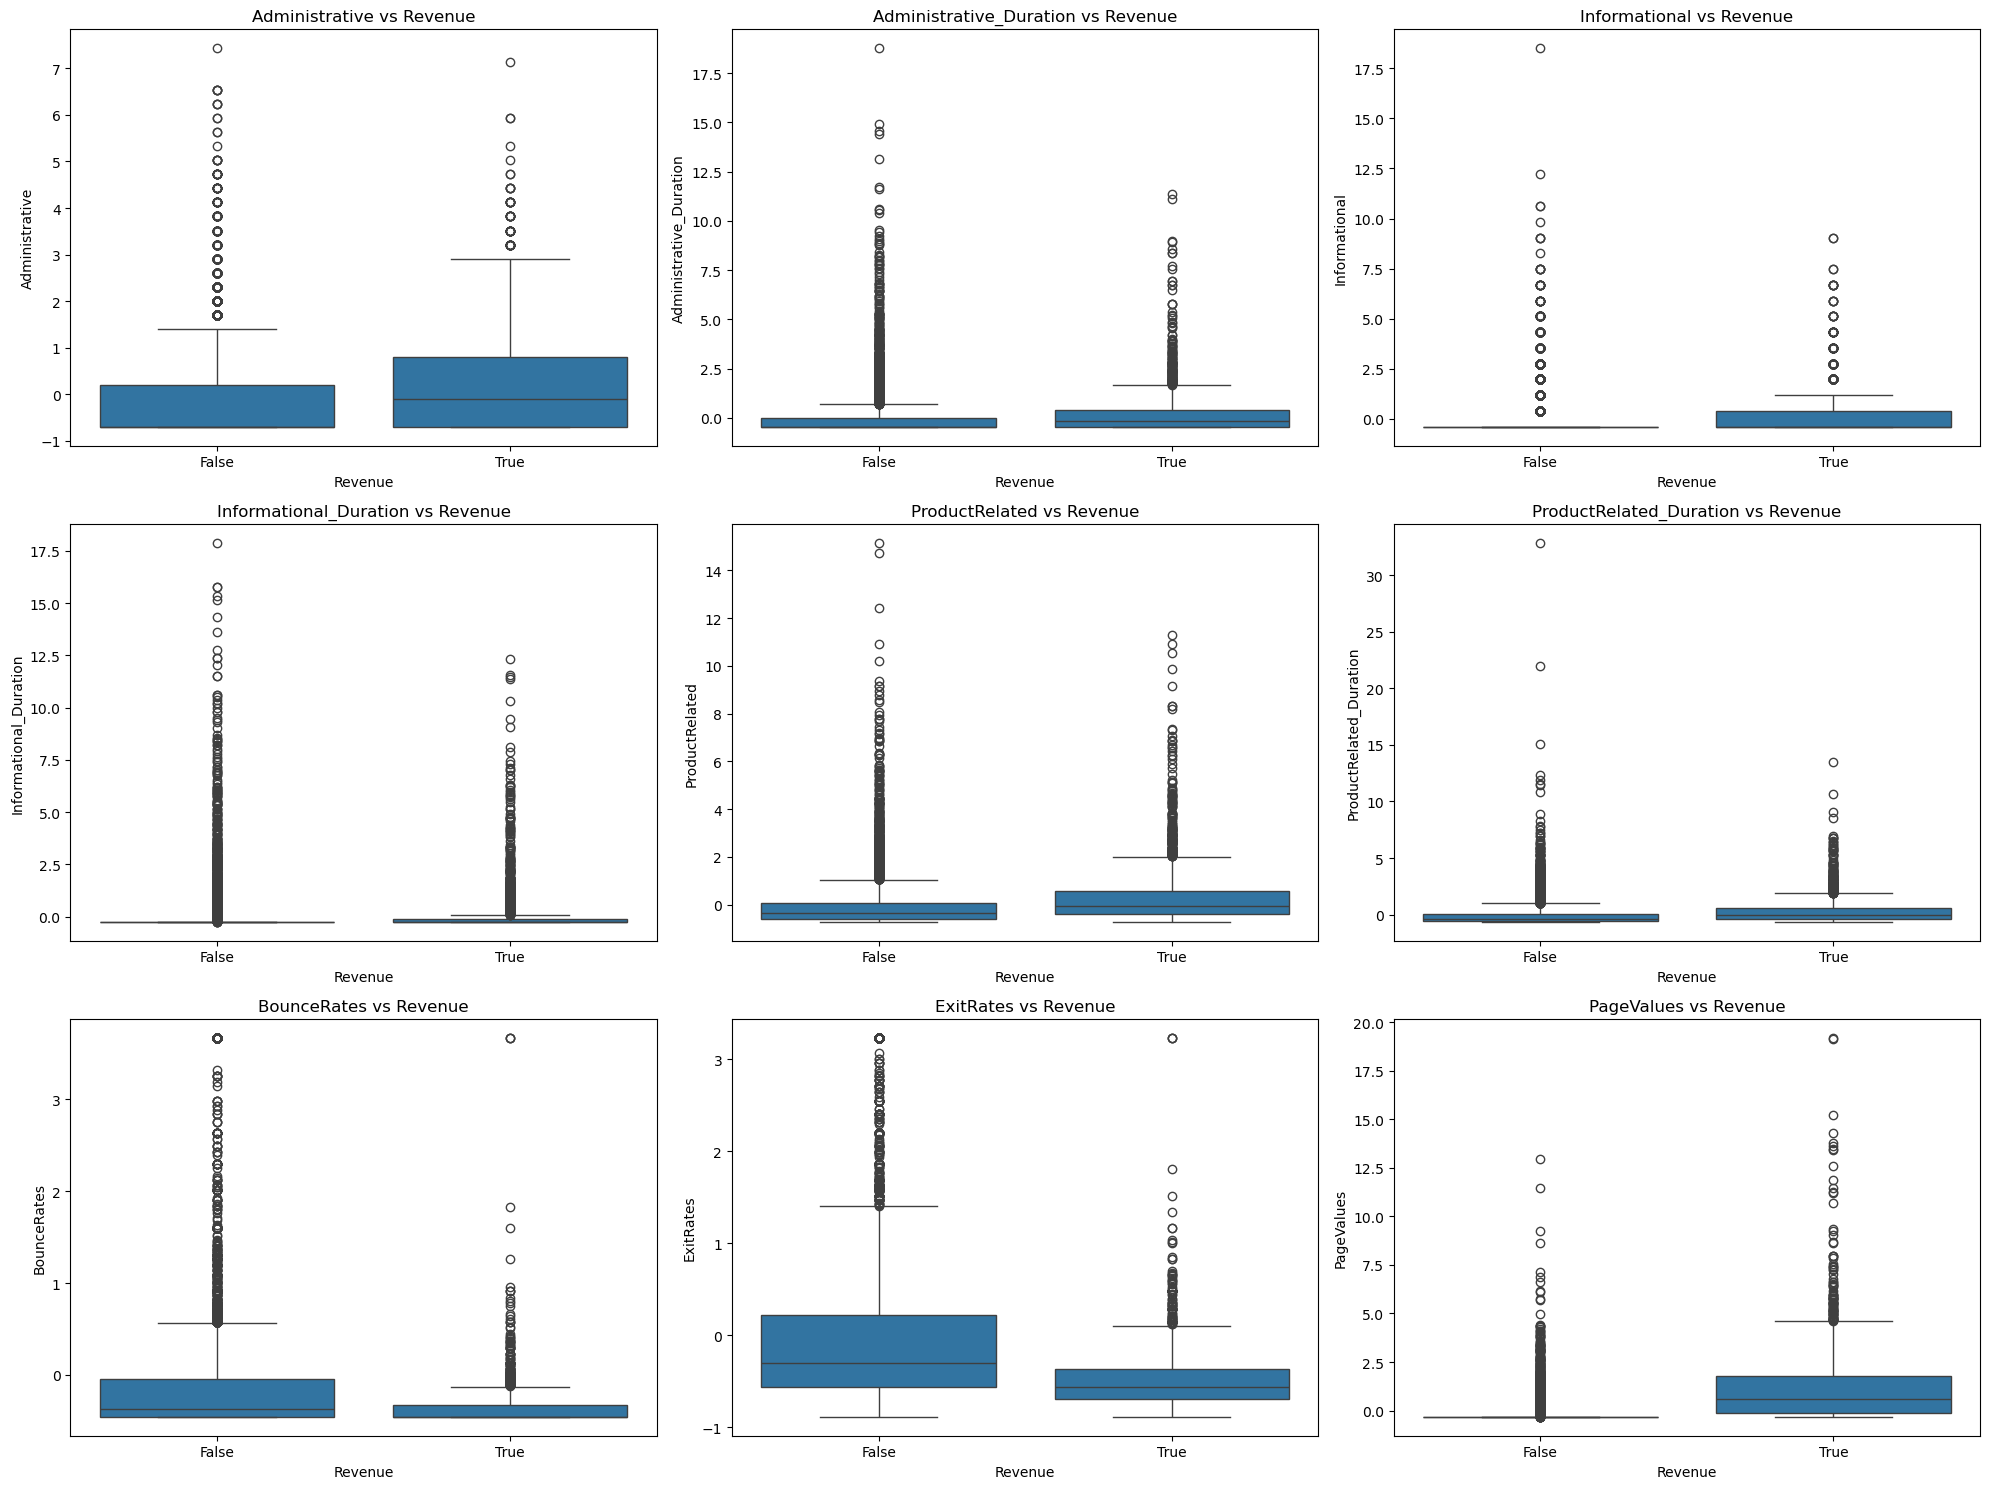

In [23]:
# Analyze the relationship between user behavior (clickstream data) and conversion rates
clickstream_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(clickstream_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Revenue', y=feature, data=scaled_data)
    plt.title(f'{feature} vs Revenue')

plt.tight_layout()
plt.show()


# Adding back initial Preprocessing post EDA pre processing(to prevent any errors)

In [25]:
data = pd.read_csv('online_shoppers_intention.csv')
# Converting the categorical variables to numerical variables
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Revenue'], axis=1))

# Adding the 'Revenue' column back to the data
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Revenue'] = data['Revenue']

# Data Splitting

In [26]:
# Split the data into training and testing sets
X = scaled_data.drop('Revenue', axis=1)
y = scaled_data['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_prob, title):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, X_train, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {title}')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlim([-1, X_train.shape[1]])
    plt.show()


# Purchase Prediction Using Random Forest Classifier(LSTM Feature Extraction), and XGBoost

Random Forest Classifier:
Accuracy: 0.8969991889699919
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3124
        True       0.72      0.56      0.63       575

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699



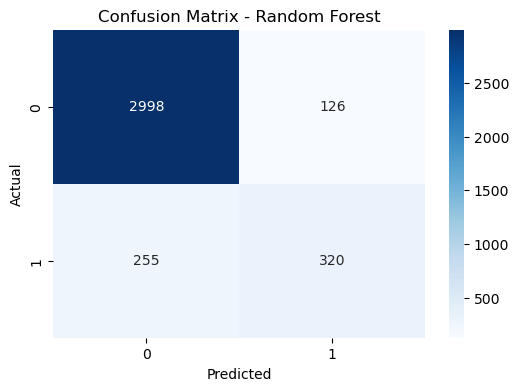

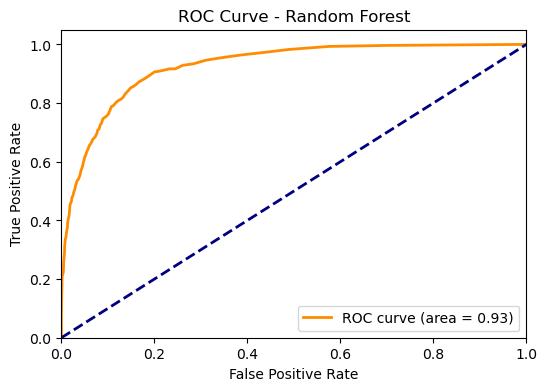

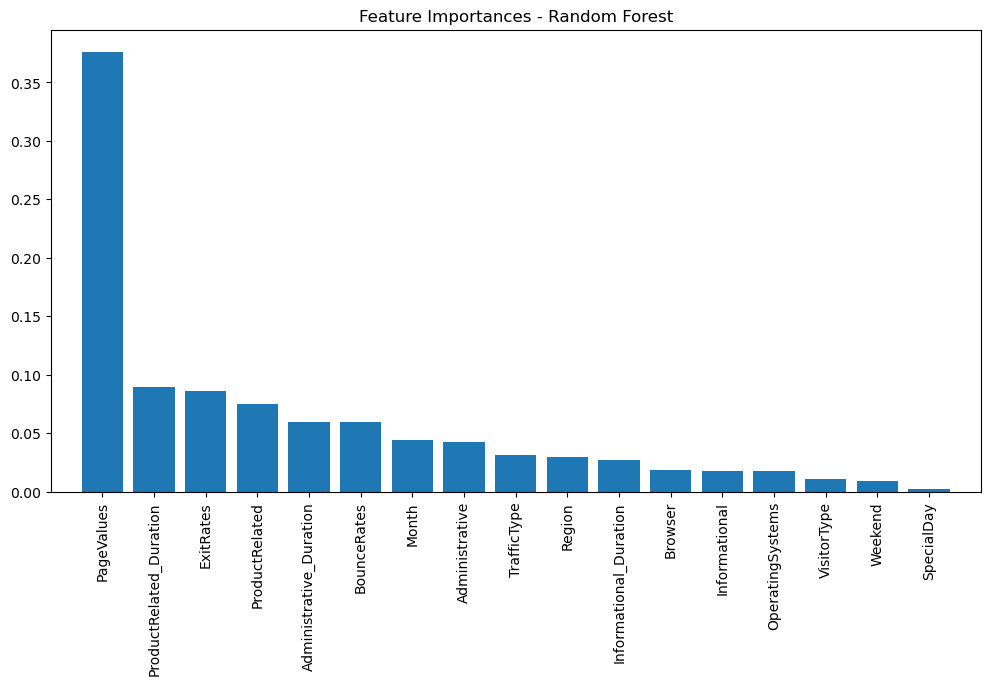

In [29]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print('Random Forest Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1], 'Random Forest')
plot_feature_importance(rf_model, X_train, 'Random Forest')

C:\Users\Venkat Naveen\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.7978 - loss: 0.5451 - val_accuracy: 0.8425 - val_loss: 0.4229
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8374 - loss: 0.4281 - val_accuracy: 0.8425 - val_loss: 0.4171
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8410 - loss: 0.4149 - val_accuracy: 0.8425 - val_loss: 0.4139
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8462 - loss: 0.4052 - val_accuracy: 0.8425 - val_loss: 0.4065
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8474 - loss: 0.3858 - val_accuracy: 0.8431 - val_loss: 0.4060
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8447 - loss: 0.3876 - val_accuracy: 0.8384 - val_loss: 0.4014
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8493 - loss: 0.3851 - val_accuracy: 0.8448 - val_loss: 0.3989
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8450 - loss: 0.3940 - val_accuracy: 

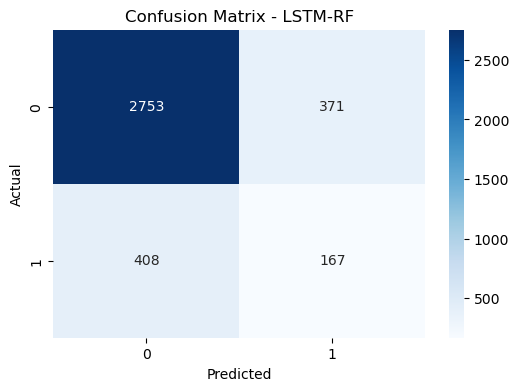

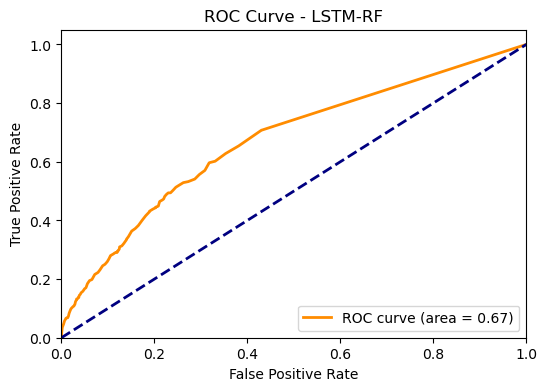

In [30]:
# LSTM-RF Model (using LSTM for feature extraction)
X_train_lstm = np.expand_dims(X_train.values, axis=2)
X_test_lstm = np.expand_dims(X_test.values, axis=2)

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_split=0.2)

lstm_features_train = lstm_model.predict(X_train_lstm)
lstm_features_test = lstm_model.predict(X_test_lstm)

rf_model_lstm = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_lstm.fit(lstm_features_train, y_train)
y_pred_lstm_rf = rf_model_lstm.predict(lstm_features_test)

print('LSTM-RF Model:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_lstm_rf)}')
print(classification_report(y_test, y_pred_lstm_rf))
plot_confusion_matrix(y_test, y_pred_lstm_rf, 'LSTM-RF')
plot_roc_curve(y_test, rf_model_lstm.predict_proba(lstm_features_test)[:, 1], 'LSTM-RF')

In [31]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print('XGBoost Classifier:')
print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.8969991889699919
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3124
        True       0.70      0.60      0.64       575

    accuracy                           0.90      3699
   macro avg       0.81      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699



# Analyzing and Predicting Cart Abandonment

In [33]:
# Analyze and predict cart abandonment
scaled_data['CartAbandoned'] = (scaled_data['Revenue'] == 0).astype(int)

X_cart = scaled_data.drop(['Revenue', 'CartAbandoned'], axis=1)
y_cart = scaled_data['CartAbandoned']

X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_cart, y_cart, test_size=0.3, random_state=42)

Random Forest Classifier for Cart Abandonment:
Accuracy: 0.8975398756420654
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       575
           1       0.92      0.96      0.94      3124

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



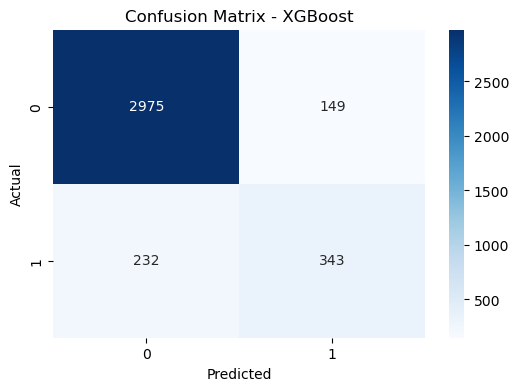

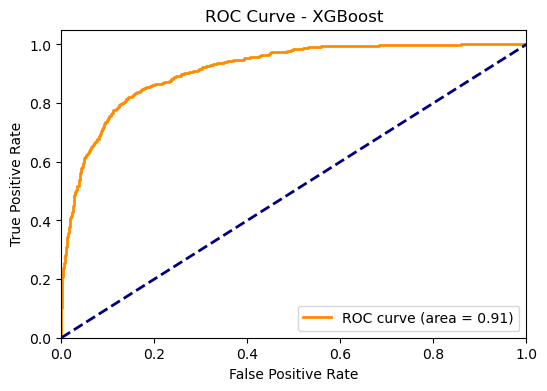

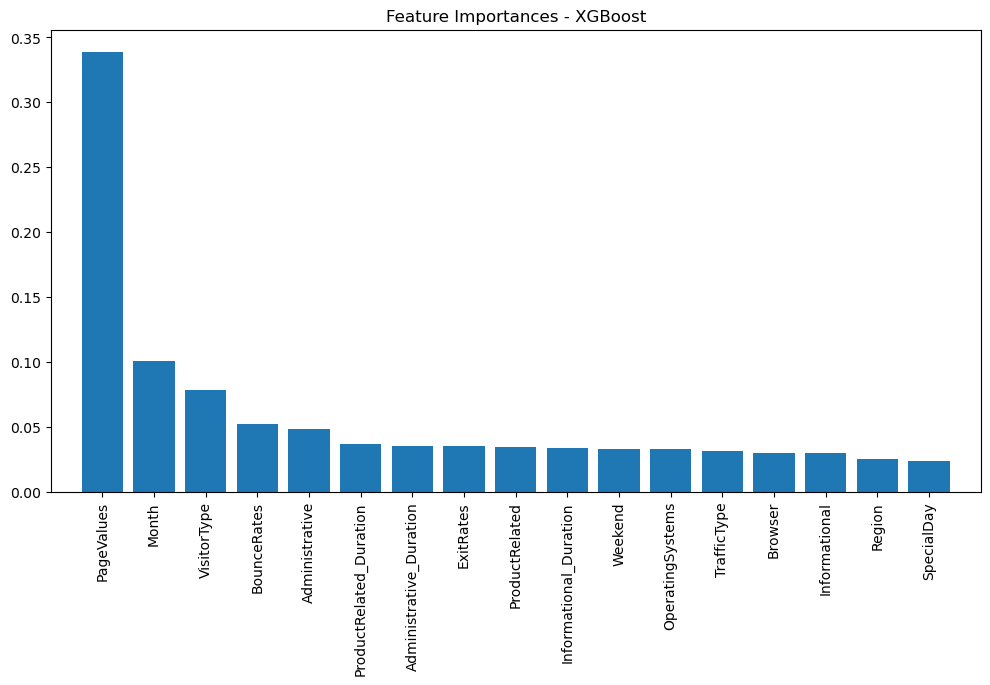

In [34]:
# Random Forest Classifier for cart abandonment
rf_model_cart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cart.fit(X_train_cart, y_train_cart)
y_pred_cart_rf = rf_model_cart.predict(X_test_cart)

print('Random Forest Classifier for Cart Abandonment:')
print(f'Accuracy: {accuracy_score(y_test_cart, y_pred_cart_rf)}')
print(classification_report(y_test_cart, y_pred_cart_rf))
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
plot_roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1], 'XGBoost')
plot_feature_importance(xgb_model, X_train, 'XGBoost')

In [59]:
# Reshape data for LSTM (samples, timesteps, features)
X_train_cart_lstm = np.expand_dims(X_train_cart.values, axis=2)
X_test_cart_lstm = np.expand_dims(X_test_cart.values, axis=2)

# Define the Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X_train_cart_lstm.shape[1], X_train_cart_lstm.shape[2])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cart_lstm, y_train_cart, epochs=10, batch_size=64, validation_split=0.2)

# Predict using the test set
y_pred_cart_lstm = (model.predict(X_test_cart_lstm) > 0.5).astype("int32")

# Evaluate the model
print('Bi-LSTM Model for Cart Abandonment:')
print(f'Accuracy: {accuracy_score(y_test_cart, y_pred_cart_lstm)}')
print(classification_report(y_test_cart, y_pred_cart_lstm))

Epoch 1/10


C:\Users\Venkat Naveen\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8009 - loss: 0.4948 - val_accuracy: 0.8425 - val_loss: 0.4185
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8445 - loss: 0.4060 - val_accuracy: 0.8437 - val_loss: 0.4080
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8603 - loss: 0.3725 - val_accuracy: 0.8442 - val_loss: 0.3952
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8443 - loss: 0.3793 - val_accuracy: 0.8448 - val_loss: 0.3842
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8529 - loss: 0.3623 - val_accuracy: 0.8466 - val_loss: 0.3807
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8580 - loss: 0.3552 - val_accuracy: 0.8518 - val_loss: 0.3752
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8566 - loss: 0.3506 - val_accuracy: 0.8529 - val_loss: 0.3659
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8626 - loss: 0.3421 - val_accuracy: 0.85

In [61]:
# Load and preprocess the data
data = pd.read_csv('online_shoppers_intention.csv')
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(['Revenue', 'SpecialDay'], axis=1))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns.drop(['Revenue', 'SpecialDay']))
scaled_data['Revenue'] = data['Revenue']

# Adding the 'CartAbandoned' column to the data
scaled_data['CartAbandoned'] = (scaled_data['Revenue'] == 0).astype(int)

Random Forest Classifier for Cart Abandonment without SpecialDay:
Accuracy: 0.8978102189781022
              precision    recall  f1-score   support

           0       0.71      0.57      0.63       575
           1       0.92      0.96      0.94      3124

    accuracy                           0.90      3699
   macro avg       0.82      0.76      0.79      3699
weighted avg       0.89      0.90      0.89      3699



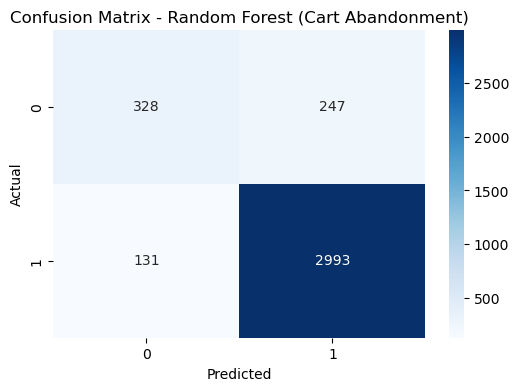

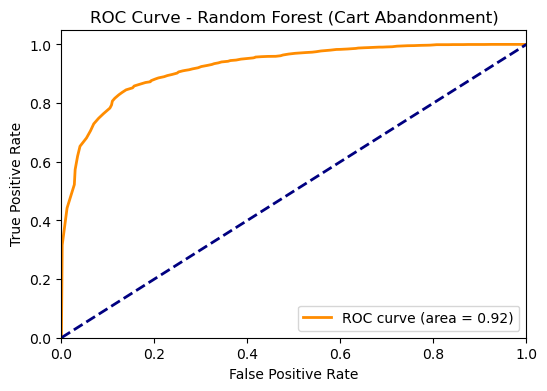

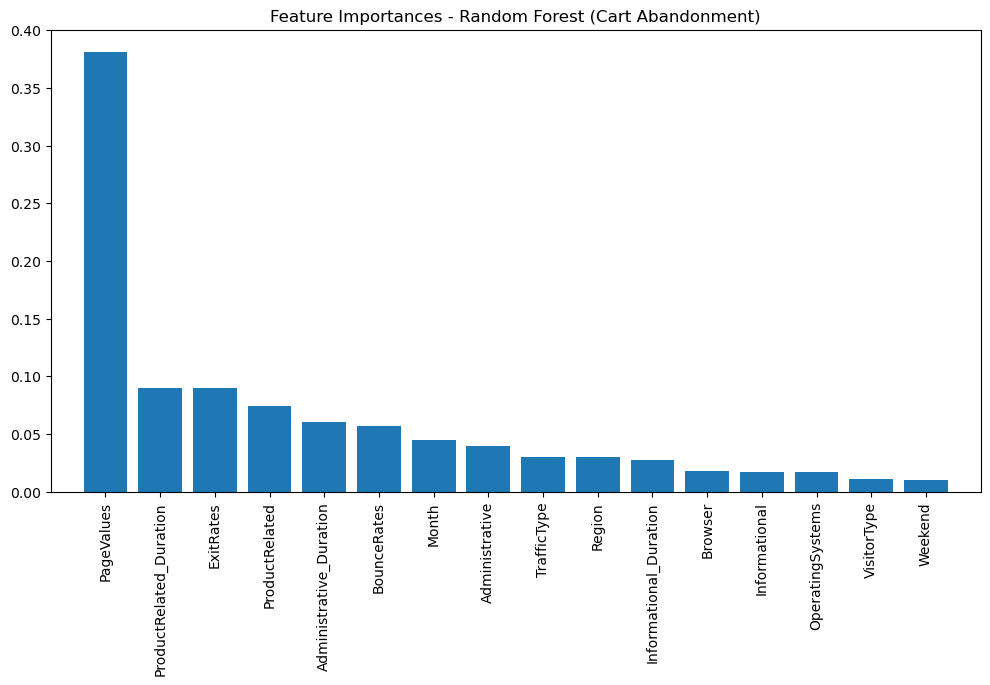

In [62]:
# Split the data into training and testing sets for cart abandonment
X_cart = scaled_data.drop(['Revenue', 'CartAbandoned'], axis=1)
y_cart = scaled_data['CartAbandoned']

X_train_cart, X_test_cart, y_train_cart, y_test_cart = train_test_split(X_cart, y_cart, test_size=0.3, random_state=42)

# Random Forest Classifier for cart abandonment
rf_model_cart = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_cart.fit(X_train_cart, y_train_cart)
y_pred_cart_rf = rf_model_cart.predict(X_test_cart)

print('Random Forest Classifier for Cart Abandonment without SpecialDay:')
print(f'Accuracy: {accuracy_score(y_test_cart, y_pred_cart_rf)}')
print(classification_report(y_test_cart, y_pred_cart_rf))
plot_confusion_matrix(y_test_cart, y_pred_cart_rf, 'Random Forest (Cart Abandonment)')
plot_roc_curve(y_test_cart, rf_model_cart.predict_proba(X_test_cart)[:, 1], 'Random Forest (Cart Abandonment)')
plot_feature_importance(rf_model_cart, X_train_cart, 'Random Forest (Cart Abandonment)')

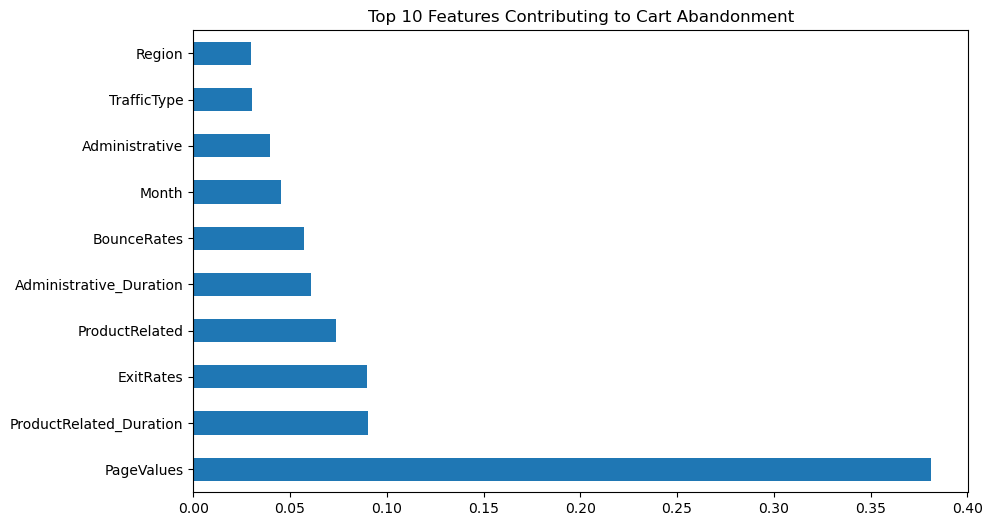

In [63]:
# Analyze features contributing to cart abandonment
feature_importances = pd.Series(rf_model_cart.feature_importances_, index=X_cart.columns)
feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Top 10 Features Contributing to Cart Abandonment')
plt.show()

# Customer Lifetime Value (CLV) Prediction using Logistic Regression

In [65]:
# We will create a synthetic 'CLV' for the purpose of this example.
# CLV is related to the number of ProductRelated pages visited and the duration(feature extraction technique from top 10 features).

data['CLV'] = data['ProductRelated_Duration'] * 0.1 + data['PageValues'] * 10

# Features for CLV prediction
features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 
            'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 
            'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 
            'VisitorType', 'Weekend']

In [66]:
# Define the feature matrix and target vector
X_clv = data[features]
y_clv = data['CLV']

# Split the data into training and testing sets
X_train_clv, X_test_clv, y_train_clv, y_test_clv = train_test_split(X_clv, y_clv, test_size=0.3, random_state=42)

# Train a regression model
clv_model = LinearRegression()
clv_model.fit(X_train_clv, y_train_clv)

# Predict CLV
y_pred_clv = clv_model.predict(X_test_clv)

In [67]:
# Evaluate the model
mse = mean_squared_error(y_test_clv, y_pred_clv)
print(f'Mean Squared Error: {mse}')

# Display the first few predictions
clv_predictions = pd.DataFrame({'Actual CLV': y_test_clv, 'Predicted CLV': y_pred_clv})
print(clv_predictions.head())

Mean Squared Error: 2.420217032561881e-25
       Actual CLV  Predicted CLV
8916   105.225595     105.225595
772    271.250363     271.250363
12250  465.511188     465.511188
7793   427.389607     427.389607
6601   596.346313     596.346313


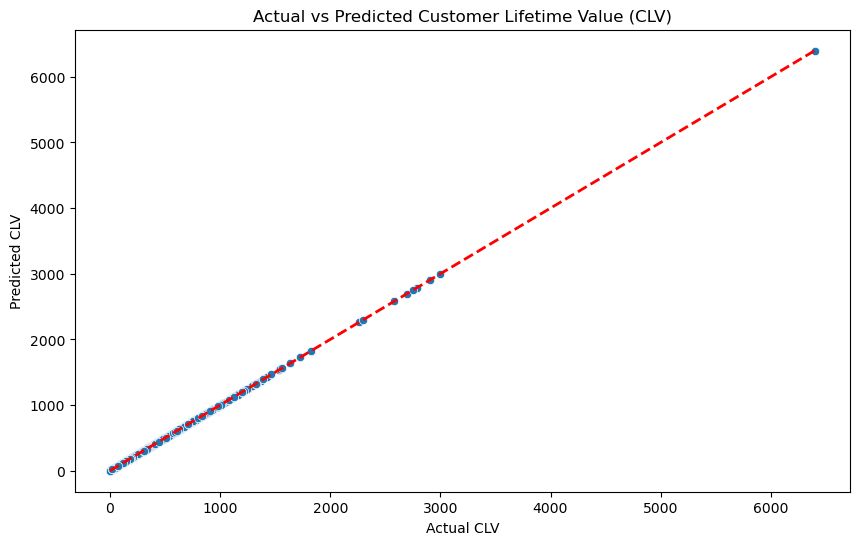

In [68]:
# Plotting the actual vs predicted CLV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual CLV', y='Predicted CLV', data=clv_predictions)
plt.plot([clv_predictions['Actual CLV'].min(), clv_predictions['Actual CLV'].max()], 
         [clv_predictions['Actual CLV'].min(), clv_predictions['Actual CLV'].max()], 
         color='red', lw=2, linestyle='--')
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted Customer Lifetime Value (CLV)')
plt.show()

# Time Series Analysis to forecast future monthly revenue

In [70]:
# Load the dataset
data = pd.read_csv('online_shoppers_intention.csv')

In [71]:
# Convert 'Month' to numerical, mapping it to 1-12
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 
    'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 
    'Nov': 11, 'Dec': 12
}
data['Month'] = data['Month'].map(month_mapping)

In [72]:
# Aggregate the data by month to get total revenue
monthly_revenue = data.groupby('Month')['Revenue'].sum().reset_index()

# Prepare the data for time series analysis
monthly_revenue.set_index('Month', inplace=True)
monthly_revenue = monthly_revenue.reindex(range(1, 13), fill_value=0)

# Replicate the data to create two full seasonal cycles
monthly_revenue_replicated = pd.concat([monthly_revenue, monthly_revenue])

In [73]:
# Apply Exponential Smoothing for forecasting
model = ExponentialSmoothing(monthly_revenue_replicated['Revenue'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# Forecast the next 12 months
forecast = fit.forecast(12)

C:\Users\Venkat Naveen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Venkat Naveen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Venkat Naveen\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


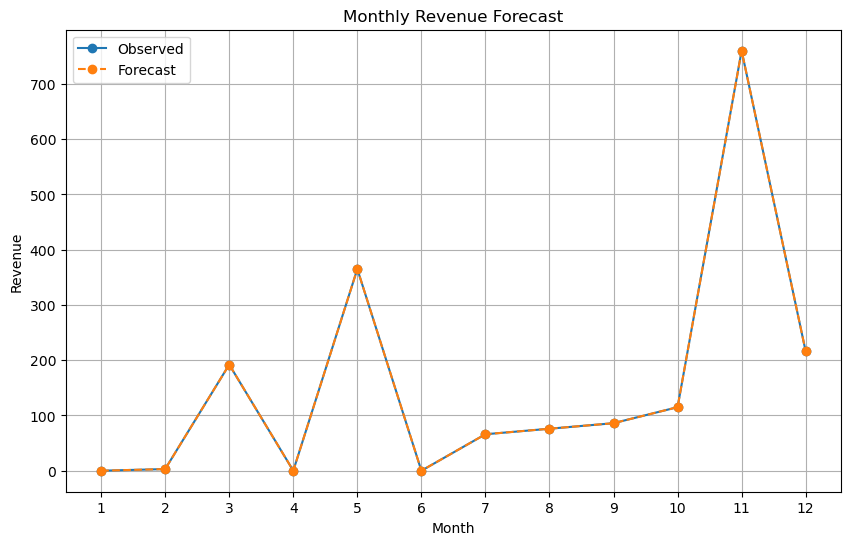

In [74]:
# Plot the observed and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue['Revenue'], marker='o', label='Observed')
plt.plot(monthly_revenue.index, forecast[:12], marker='o', linestyle='--', label='Forecast')
plt.title('Monthly Revenue Forecast')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()